In [55]:
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('dark_background')



In [22]:
df = pd.read_json("train.json", orient='columns')
df.columns = ["file", "q", "r"]
df.head()    

,file,q,r
0,img000001.jpg,"[-0.419541, -0.484436, -0.21417899999999998, 0...","[-0.21081000000000003, -0.094466, 6.705986]"
1,img000002.jpg,"[0.516575, -0.514759, 0.6841659999999999, 0.00...","[0.116806, -0.007084, 3.046739]"
2,img000003.jpg,"[0.500257, -0.6960919999999999, 0.398871, 0.32...","[0.565498, -0.182691, 12.963307]"
3,img000004.jpg,"[0.8012, -0.20998000000000003, 0.2172079999999...","[0.326352, 0.06979, 10.924485]"
4,img000005.jpg,"[0.541851, -0.7244700000000001, -0.294286, -0....","[0.0035989999999999998, 0.057942, 3.419766]"


In [28]:
#df["q1"], df["q2"], df["q3"], df["q4"] = df["q"]
qseries = df["q"].apply(pd.Series)
qseries = qseries.rename(columns = lambda x : "q" + str(x))
rseries = df["r"].apply(pd.Series)
rseries = rseries.rename(columns= lambda x : "r" + str(x))
data = pd.concat([df, qseries, rseries], axis=1)
data = data.drop(data.columns[[1, 2]], axis=1)  # df.columns is zero-based pd.Index 
data.head()

,file,q0,q1,q2,q3,r0,r1,r2
0,img000001.jpg,-0.419541,-0.484436,-0.214179,0.737180,-0.210810,-0.094466,6.705986
1,img000002.jpg,0.516575,-0.514759,0.684166,0.009504,0.116806,-0.007084,3.046739
2,img000003.jpg,0.500257,-0.696092,0.398871,0.325731,0.565498,-0.182691,12.963307
3,img000004.jpg,0.801200,-0.209980,0.217208,0.516534,0.326352,0.069790,10.924485
4,img000005.jpg,0.541851,-0.724470,-0.294286,-0.308118,0.003599,0.057942,3.419766


In [29]:

data.describe()

,q0,q1,q2,q3,r0,r1,r2
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.003844,0.008308,-0.004804,0.040434,-0.001765,-0.003058,10.898330
std,0.524575,0.501879,0.498334,0.472168,0.321561,0.411131,6.013979
min,-0.996167,-0.987963,-0.985319,-0.997179,-2.566746,-2.808821,2.999583
25%,-0.426117,-0.411557,-0.425482,-0.325118,-0.157752,-0.192461,6.140900
50%,-0.022509,0.004877,-0.000723,0.056800,-0.001130,-0.000884,9.684316
75%,0.434949,0.420966,0.415784,0.423960,0.152282,0.191384,14.259408
max,0.995054,0.996202,0.987911,0.998974,2.356750,2.867943,40.245524


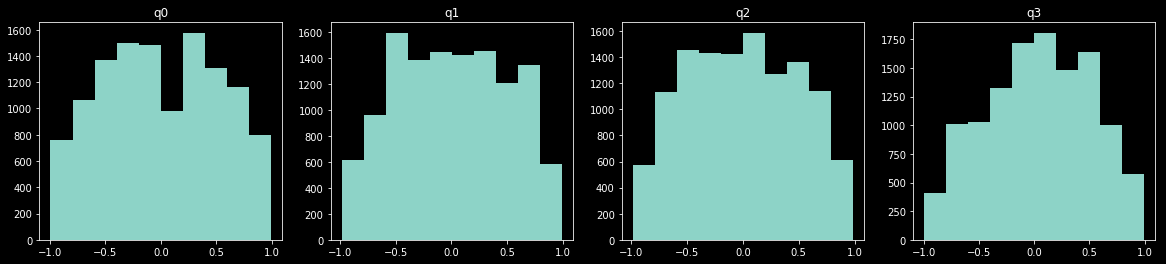

In [59]:
cols = 4
fig, axes = plt.subplots(1, cols, figsize=(20, 4))
for i in range(cols):
    idx = "q" + str(i) 
    axes[i].hist(data[idx])
    axes[i].set_title(idx)
#fig.tight_layout()

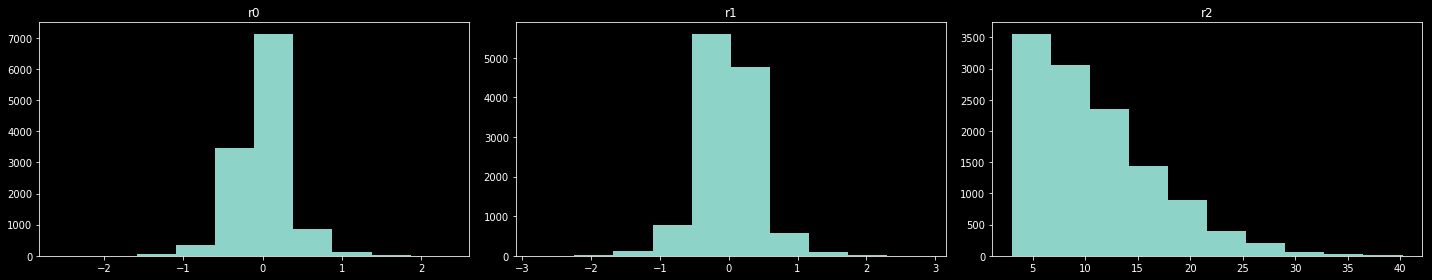

In [56]:
cols = 3
fig2, axes2 = plt.subplots(1, cols, figsize=(20, 4))
for i in range(cols):
    idx = "r" + str(i) 
    axes2[i].hist(data[idx])
    axes2[i].set_title(idx)
fig2.tight_layout()


ojo  r2 distribution!!